# BANK CUSTOMERS RETIREMENT PREDICTIONS USING SUPPORT VECTOR MACHINES


# STEP #1: PROBLEM STATEMENT

You work as a data scientist at a major bank in NYC and you have been tasked to develop a model that can predict whether a customer is able to retire or not based on his/her features. Features are his/her age and net 401K savings (retirement savings in the U.S.). You though that Support Vector Machines can be a great candidate to solve the problem. 

# STEP #2: IMPORTING DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=pd.read_csv('Bank_Customer_retirement.csv')


In [6]:
data.keys()

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

In [7]:
data.shape

(500, 4)

In [9]:
data.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [10]:
data.tail()

,Customer ID,Age,401K Savings,Retire
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


# STEP #3: VISUALIZING THE DATA

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


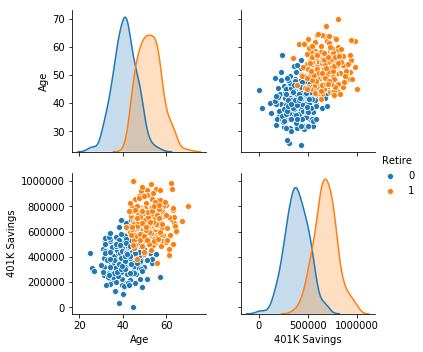

In [14]:
sns.pairplot(data,hue='Retire',vars=['Age','401K Savings'])

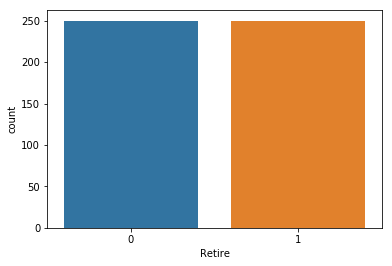

In [16]:
sns.countplot(data.Retire,label='Requirement')

# STEP #4: MODEL TRAINING 

In [24]:
data=data.drop(['Customer ID'],axis=1)

In [25]:

# Let's drop the target label coloumns
X=data.iloc[:,:-1]
y=data.Retire

In [26]:
X

,Age,401K Savings
0,39.180417,322349.87400
1,56.101686,768671.57400
2,57.023043,821505.47180
3,43.711358,494187.48500
4,54.728823,691435.77230
5,50.499789,742398.90680
6,39.573302,578650.31560
7,55.159309,533821.20110
8,30.791271,459592.40840
9,40.456073,396800.25090


In [27]:
y

0      0
1      1
2      1
3      0
4      1
5      1
6      0
7      1
8      0
9      0
10     0
11     0
12     0
13     1
14     1
15     1
16     0
17     1
18     0
19     1
20     1
21     0
22     1
23     1
24     0
25     1
26     0
27     1
28     0
29     0
      ..
470    0
471    0
472    0
473    0
474    0
475    1
476    1
477    0
478    0
479    1
480    1
481    1
482    0
483    1
484    1
485    0
486    0
487    0
488    1
489    0
490    1
491    1
492    0
493    1
494    0
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=10)

In [29]:
X_train.shape

(400, 2)

In [30]:
X_test.shape

(100, 2)

In [32]:
y_train.shape

(400,)

In [33]:
y_test.shape

(100,)

In [34]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# STEP #5: EVALUATING THE MODEL

In [35]:
y_predict=svm_model.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

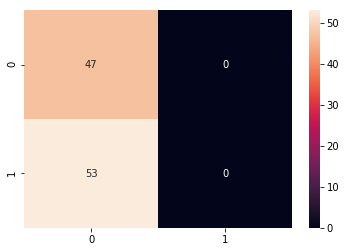

In [39]:
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

In [40]:
print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

          0       0.47      1.00      0.64        47
          1       0.00      0.00      0.00        53

avg / total       0.22      0.47      0.30       100



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# STEP #6: IMPROVING THE MODEL

In [47]:
param_grid={'C':[1,10,100,1000],'gamma':[1,.1,.01,.001],'kernel':['rbf']}

In [48]:
from sklearn.model_selection import GridSearchCV
grid_model=GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [50]:
grid_model.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.5074626865671642, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.5074626865671642, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.5075757575757576, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.5074626865671642, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.5074626865671642, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.5075757575757576, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.001, kernel=rbf, score=0.5227272727272727, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.5074626865671642, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.5074626865671642, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.5075757575757576, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.5074626865671642, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.5074626865671642, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.5075757575757576, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [51]:
grid_model.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [52]:
grid_model.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
grid_predictions = grid_model.predict(X_test)

In [54]:
cm=confusion_matrix(y_test,grid_predictions)

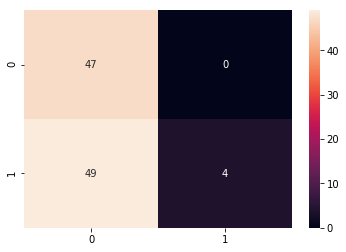

In [55]:
sns.heatmap(cm,annot=True)

In [56]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.49      1.00      0.66        47
          1       1.00      0.08      0.14        53

avg / total       0.76      0.51      0.38       100

